# Plots

1. ~~CDC ILInet vs WHONreVSS~~
2. ~~WHO: subtyped~~                  
3. Instability                        
4. Bryan decay      

In [1]:
%matplotlib inline

In [133]:
import matplotlib
# import seaborn as sns

matplotlib.rcParams['ps.useafm'] = True
matplotlib.rcParams['pdf.use14corefonts'] = True
matplotlib.rcParams['text.usetex'] = False

matplotlib.rcParams['font.family'] = "Times New Roman"

lw, fs, fc, style = 1.5, 12, "#f0f0f0", 'fivethirtyeight'

from matplotlib import pyplot as plt

In [3]:
import pandas as pd
import numpy as np
from arlrEpiNaren.v2.src import dataUtils

## Using processed CDC

In [134]:
cdc_processed_file = '/home/prithwi/repos/Papers/2015_How_Not/data/cdc-combined-national-2015-05-25.csv'
cdc = pd.read_csv(cdc_processed_file, index_col='date', parse_dates=True)


def detrend(df):
    return df - df.mean(axis=0)

cdc[['NormalizedILI', 'NormalizedTOTAL']] = (cdc[['ILITOTAL', 'TOTAL PATIENTS', 'season']].groupby('season')
                                             .apply(normalize)[['ILITOTAL', 'TOTAL PATIENTS']])

used_cdc = cdc.query('2004 < season < 2015')

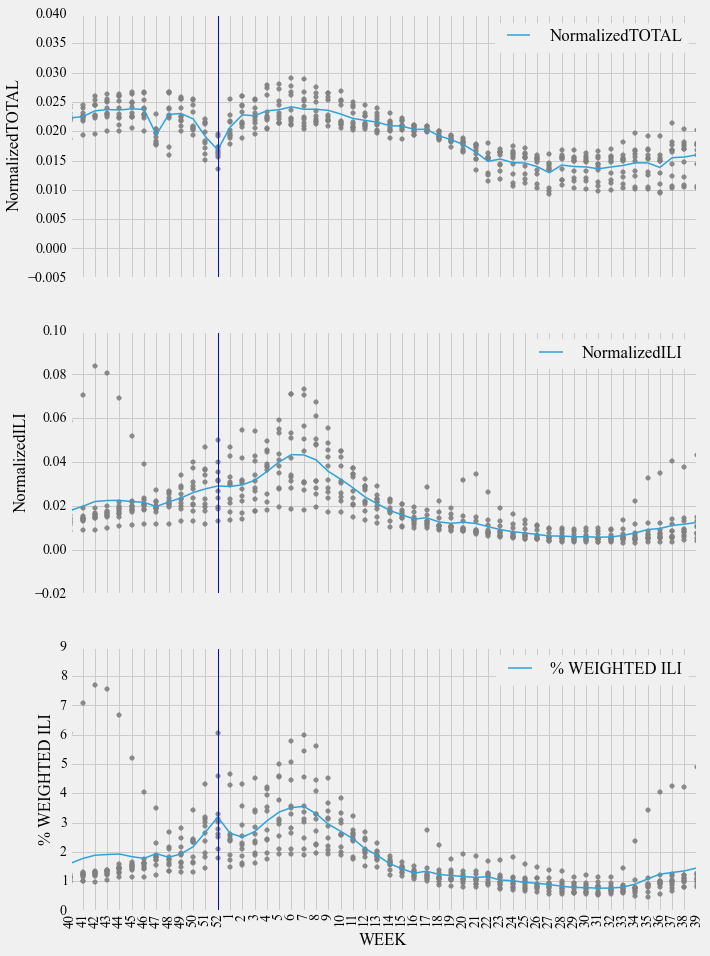

In [135]:
metrics = ['NormalizedTOTAL', 'NormalizedILI', '% WEIGHTED ILI']

meanDF = used_cdc.groupby('WEEK').mean()[metrics]
stdDF = used_cdc.groupby('WEEK').std()[metrics]

x=np.r_[np.arange(40, 53), np.arange(1,40)]
other_x = np.arange(len(x))
index_map = dict(zip(x, other_x))

plot_cdc = used_cdc[['WEEK'] + metrics].copy()
plot_cdc = plot_cdc[plot_cdc['WEEK'] < 53]
plot_cdc['WEEK'] = plot_cdc['WEEK'].apply(lambda x: index_map[x])

plot_meanDF = meanDF.ix[x, :].reset_index()
plot_stdDF = stdDF.ix[x, :].reset_index()

with plt.style.context((style)):
    figX, axX = plt.subplots(3, 1, figsize=(10, 15), sharex=True)
    
    for (idx, ax) in enumerate(axX): 
        _metric = metrics[idx]
        
        # Scatter Plot
        plot_cdc[['WEEK', _metric]].plot(x='WEEK', y=_metric, ax=ax, kind='scatter', 
                                        alpha=0.9, color='grey')
        plot_meanDF[_metric].plot(ax=ax, kind='line', lw=1.5, legend=True)
        ax.axvline(index_map[52], lw=1.)
    else:
        ax.set_xticks(other_x)
        ax.set_xticklabels(x, rotation='90')
    fig.tight_layout()


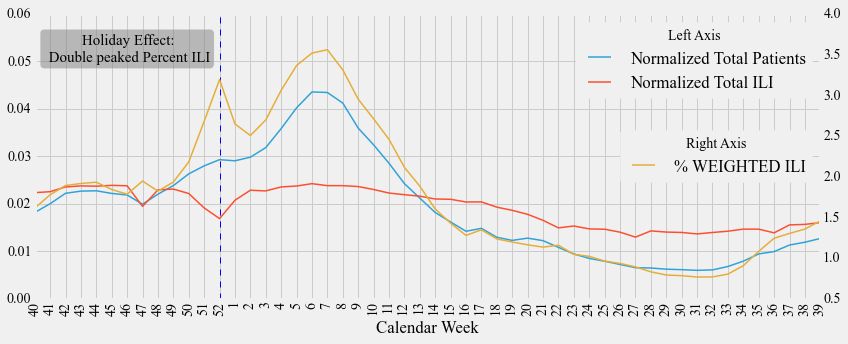

In [136]:
with plt.style.context((style)):
    fig, ax = plt.subplots(1, 1, figsize=(12, 5), sharex=False)
    
    plot_meanDF['NormalizedILI'].plot(ax=ax, kind='line', lw=1.5)
    plot_meanDF['NormalizedTOTAL'].plot(ax=ax, kind='line', lw=1.5)
    plot_meanDF['% WEIGHTED ILI'].plot(ax=ax, kind='line', lw=1.5, secondary_y=True)
    
    ax.legend(['Normalized Total Patients', 'Normalized Total ILI'], title='Left Axis', loc='upper right')
    ax.right_ax.legend(['% WEIGHTED ILI'], title='Right Axis', loc='center right')
    
    ax.axvline(index_map[52], ls='--', lw=1.,)
    ax.text(index_map[46], 0.05,
             "Holiday Effect:\n Double peaked Percent ILI",
             fontsize=15, ha='center',
             bbox=dict(boxstyle='round', alpha=0.5, facecolor='grey')
            )
    
    ax.set_xticks(other_x)
    ax.set_xticklabels(x, rotation='90')
    ax.set_xlabel('Calendar Week ')
    ax.set_ylim([0, 0.06])
    fig.tight_layout()
          